In [ ]:
from google.colab import drive
drive.mount('')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir(")

### Encoder and Decoder using Autoencoder

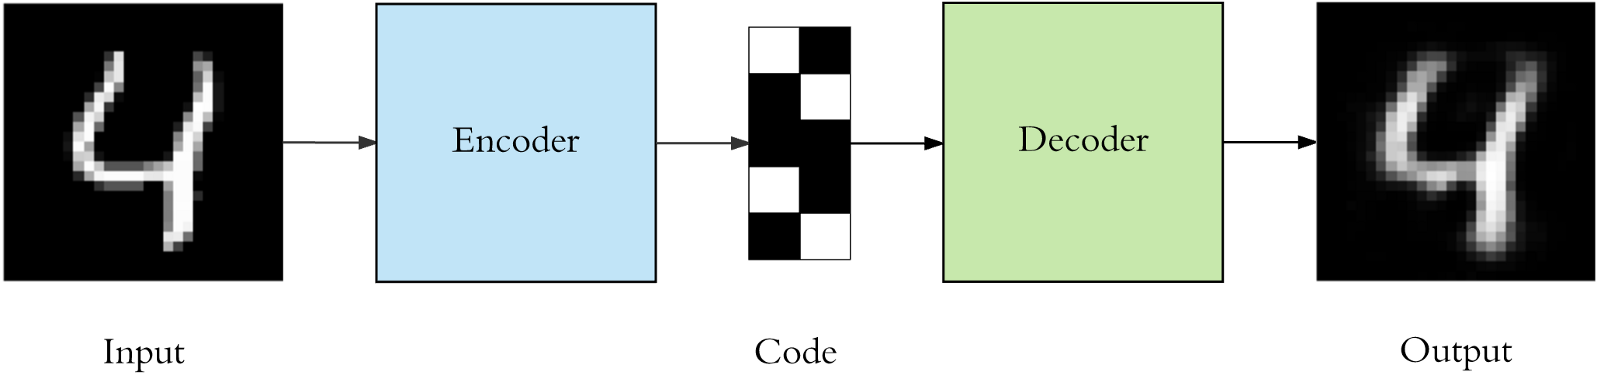

In [ ]:
from IPython.display import Image
Image(filename='encodeco.png')

1. Autoencoders is a full connected neural network and we can use gradient descent back propagation in autoencoders.

2. They are unsupervisded learning models.

3. In the case of an auto encoder the input and the output are the same. Autoencoder is an unsupervised model, all we get is inputs and there are no labels.

4. **Compression auto encoders/vanilla auto encoders/under complete auto encoders** moves the input into lower dimension hidden space and tries to reconsturct the original input at the output space. 

  1. Post the model training the weights will turn into important feature extractors.

 2. Once this network is trained it is used for dimensionality reduction for test data, by removing the decoder part.

  3. This is not a linear dimensionality reduction like PCA, but is a non-linear dimensionality reduction.

5. **Over complete auto encoders** moves the input into higher dimension hidden space and tries to reconsturct the original input at the output space.

  1. When a variable is transformed to higher dimensional space reconstruction is not a hard thing to accomplish.

  2. Over complete autoencoder by itself isn’t adding much value. We need a regularization technique to make sure that this kind of identity learning doesn’t happen and actually it learns a meaningful feature extraction.

  3. Denoising auto encoder is a very good regularization technique. It involves reconstructing the original input with a corrupted version of it. The corruption involves randomly setting a portion of input dimension to 0.

6. In the situations where we have less labelled data and more unlabelled data, we can train the classifier on "h" instead of training on "x". We train the classifier on (h, y) pairs instead of (x, y) pairs.

**Autoencoders Applications**

1. Denoising
2. Anamoly Detection
3. Feature Generation

**MNIST Datset**

The training set consists of handwritten digits collected from different people. Each image is represented as a grid of 28*28 pixels.

**Features**

Each feature vector (row in the feature matrix) consists of 784 pixels (intensities) -- unrolled from the original 28x28 pixels images.

It has a training set of 60,000 examples, and a test set of 10,000 examples.

**Number of classes**

Target variable (discrete): {0, 1, 2, ..., 9}

In [ ]:
from keras.datasets import mnist
from keras.layers import Dropout
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


An image will be broken down into pixels. A pixel is the smallest item of information in an image.

An image is therefore arranged as a matrix/grid of pixel values.

Eah pixel represents a single color. And this one color is represented as a binary value in order for the computer to store the image.

A black and white will have a one layer where as a color image will have 3 layers(RGB).

In the above example each image is of size (28 * 28) and they are all black and white images. If it is a color picture the dimension would have been (28 * 28 * 3).

pixel values are integers that range from 0 (black) to 255 (white). For color image there will be combinations of these pixel values in 3 channels.



**Normalizing the pixel values**

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


**Flatten the 28x28 images into vectors of size 784**

In [ ]:
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


**Fully-connected neural layer as encoder and as decoder:**

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

In [ ]:
# The size of encoded and actual representations
encoding_dim = 32 
actual_dim = x_train.shape[1]
actual_dim

784

In [ ]:
# Input layer
input_img = Input(shape =(actual_dim,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(actual_dim, activation='sigmoid')(encoded)

Input shape is the only dimension your model expects. Rest of them are intuitive. Input shape must match with the attriubtes in the data used for fitting the model.

If your input shape has only one dimension, you don't need to give it as a tuple, you give input_dim as a scalar number.

So, in your model, where your input layer has 3 elements, you can use any of these two:

 1. shape = (3,) -- The comma is necessary when you have only one dimension
 2. input_dim = 3

**Tensor** is the primary data structure used by neural networks.

The inputs, outputs, and transformations within neural networks are all represented using tensors, and as a result, neural network programming utilizes tensors heavily.

In [ ]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

After defining each layer, we build a model using modelAPI by connecting the start and end layers.

In [ ]:
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


**Create a separate encoder model:**

In [ ]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [ ]:
print(encoder.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None


**Create a separate decoder model**

In [ ]:
autoencoder.layers

In [ ]:
autoencoder.layers[-1]

In [ ]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1](encoded_input)

# create the decoder model
decoder = Model(encoded_input, decoder_layer)

In [ ]:
print(decoder.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________
None


**Configuring the autoencoder model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:**

In [ ]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Finally, we compile the model by mentioning the loss function, optimizer and the error metric to use.

**Train our autoencoder for 50 epochs:**

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs = 50,
                batch_size = 256,
                shuffle = True,
                validation_data = (x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6925 - val_loss: 0.6924
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6924 - val_loss: 0.6923

We then fit the model on the training data. 

Here we need to specify X_train, y_train, number of epochs(iterations), and batch size. 

1. Epochs is the number of times the model is going through the entire training set. 

2. The batch size is how many points at a time we are choosing as a batch.

Usually, the dataset might be very big (general requirement for NNs) and we cannot fit complete data at once. Therefore, we use batch size. This divides our data into batches each of size equal to batch_size. Now only this number of samples will be loaded into memory and processed. Once we are done with one batch it is flushed from memory and the next batch will be processed.

Say, batch size is mentioned as 100 and we have a total of 100,000 data points. They will be divided into 1000 batches, with each batch of size 100. So, weight adjustments will be done 1000 times once for each batch. This will be done 30 times – 30 Epochs. So, overall weight adjustments happen 30,000 times.

Fit returns the history of model training. History consists of model accuracy and losses after each epoch. 

**Visualize the reconstructed inputs and the encoded representations for test images using Matplotlib.**

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [ ]:
encoded_imgs[1].shape

(32,)

In [ ]:
decoded_imgs[1].shape

(784,)

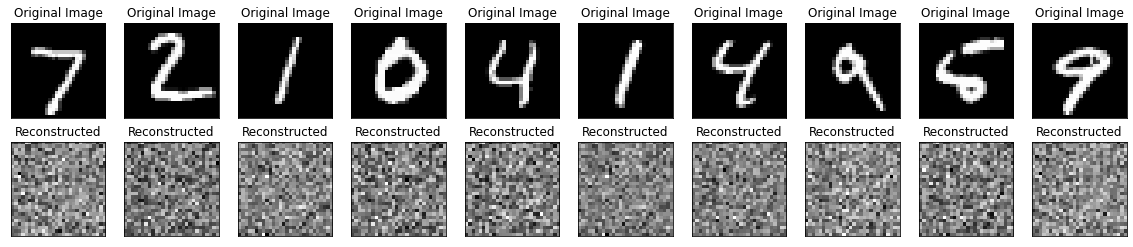

In [ ]:
# use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Original Image')
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Reconstructed')

plt.show()

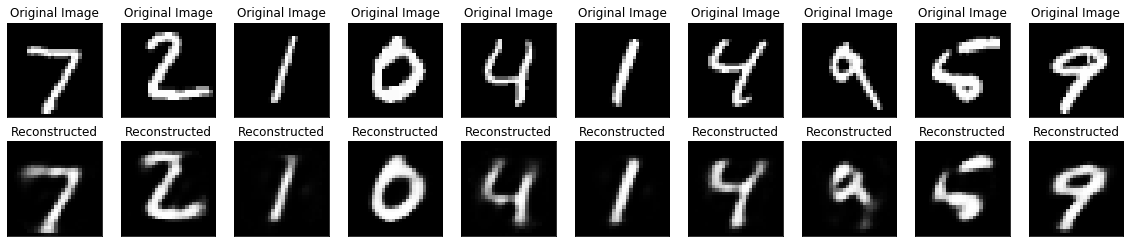

In [ ]:
Image(filename='output.png')

In [ ]:
# Input layer
input_img = Input(shape=(actual_dim,))

# Dropout
drop = Dropout(0.5)(input_img)

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(drop)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(actual_dim, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs = 50,
                batch_size = 256,
                shuffle = True,
                validation_data = (x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.6935 - val_loss: 0.6925
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6933 - val_loss: 0.6923
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6931 - val_loss: 0.6921
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6929 - val_loss: 0.6919
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6927 - val_loss: 0.6918
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6925 - val_loss: 0.6916
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6922 - val_loss: 0.6914
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6921 - val_loss: 0.6912
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6918 - val_loss: 0.6910
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6916 - val_loss: 0.6908